# Linear Regrssion on US Housing Price
**Dataset**

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Goal**

In this case, we are going to predict the price of the house using  the other given columns But the question is in what way does Price depend on the other measures(columns).

Price is the Dependent Variable and other columns are Independent Variable

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [23]:
df = pd.read_csv("USA_Housing.csv")

In [24]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.459,5.683,7.009,4.090,23086.801,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642,6.003,6.731,3.090,40173.072,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067,5.866,8.513,5.130,36882.159,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240,7.188,5.587,3.260,34310.243,1260616.807,USS Barnett\nFPO AP 44820
4,59982.197,5.041,7.839,4.230,26354.109,630943.489,USNS Raymond\nFPO AE 09386


## EDA

In [25]:
df.shape

(5000, 7)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


There are no null values in the given dataset

In [27]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,68583.109,5.977,6.988,3.981,36163.516,1232072.654
std,10657.991,0.991,1.006,1.234,9925.650,353117.627
min,17796.631,2.644,3.236,2.000,172.611,15938.658
10%,55047.634,4.698,5.682,2.310,23502.845,772031.775
25%,61480.562,5.322,6.299,3.140,29403.929,997577.135
50%,68804.286,5.970,7.003,4.050,36199.407,1232669.378
75%,75783.339,6.651,7.666,4.490,42861.291,1471210.204
90%,82081.188,7.244,8.274,6.100,48813.619,1684620.954
max,107701.748,9.519,10.760,6.500,69621.713,2469065.594


In [28]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Data Preparation

1. Since, there are no null values in the datset , so there is no need of deleting or replacing the data.
2. There is no necessity of having Address column/feature, so let's drop it.

In [29]:
df.drop(['Address'], axis=1, inplace = True)

In [30]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.459,5.683,7.009,4.090,23086.801,1059033.558
1,79248.642,6.003,6.731,3.090,40173.072,1505890.915
2,61287.067,5.866,8.513,5.130,36882.159,1058987.988
3,63345.240,7.188,5.587,3.260,34310.243,1260616.807
4,59982.197,5.041,7.839,4.230,26354.109,630943.489


### Data Visualization

Here we are actually checking the relationships between each independent variable and the dependent variable using scatterplots and correlations.

**Pairplots using seaborn**

C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

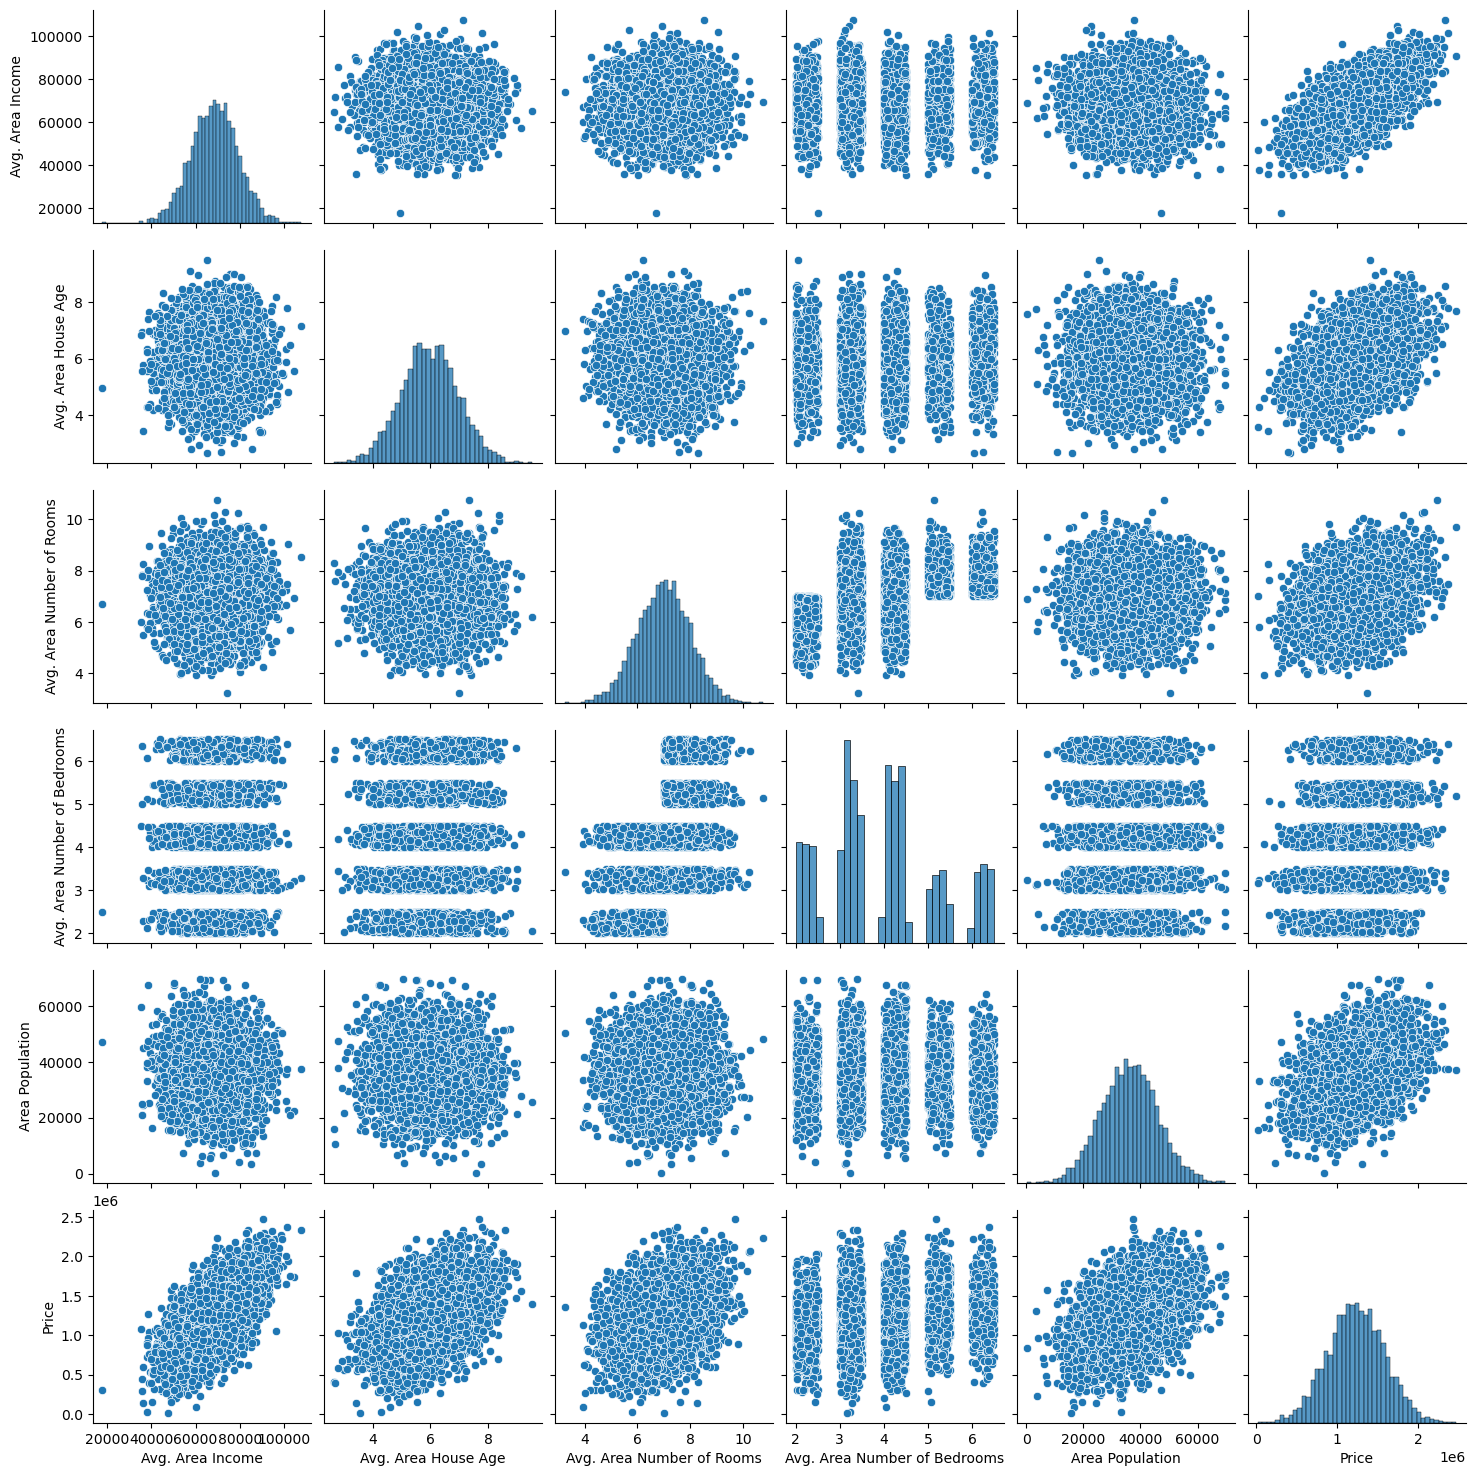

In [32]:
sns.pairplot(df, kind = 'scatter')

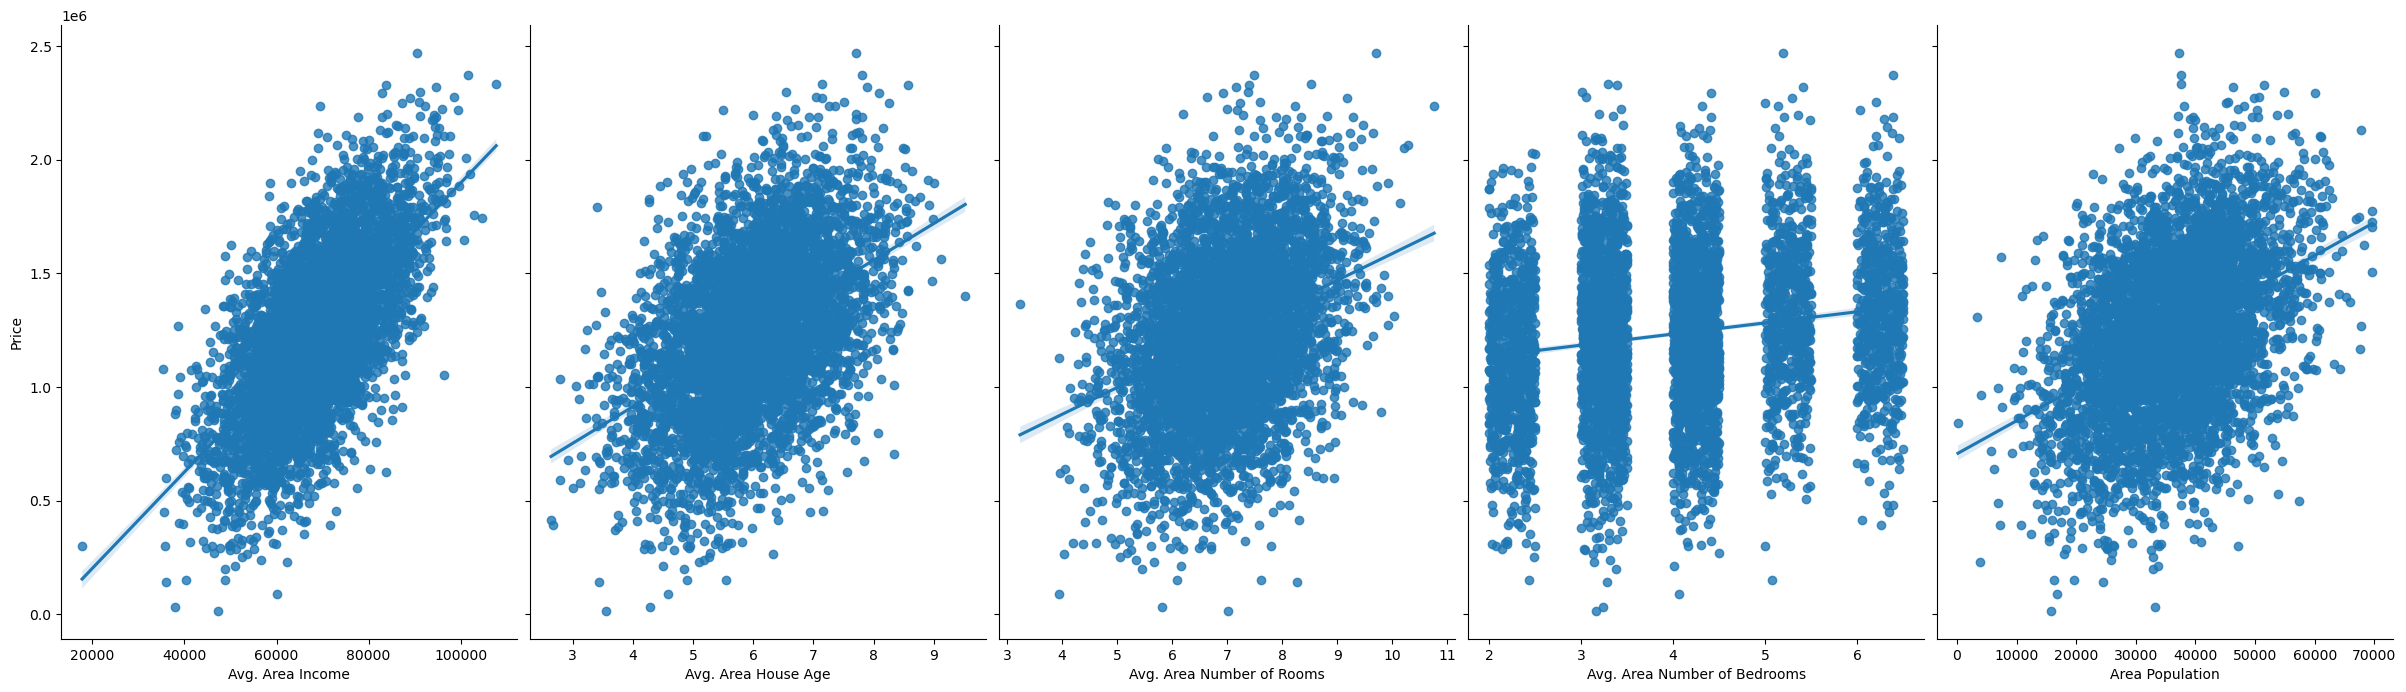

In [33]:
sns.pairplot(df, x_vars = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'],
            y_vars = 'Price',height = 7 ,aspect = 0.7, kind = 'reg')

### To avoid overploting , lets draw a random sample of 50 datapoints from each column

In [34]:
sample_df = df.sample(50)

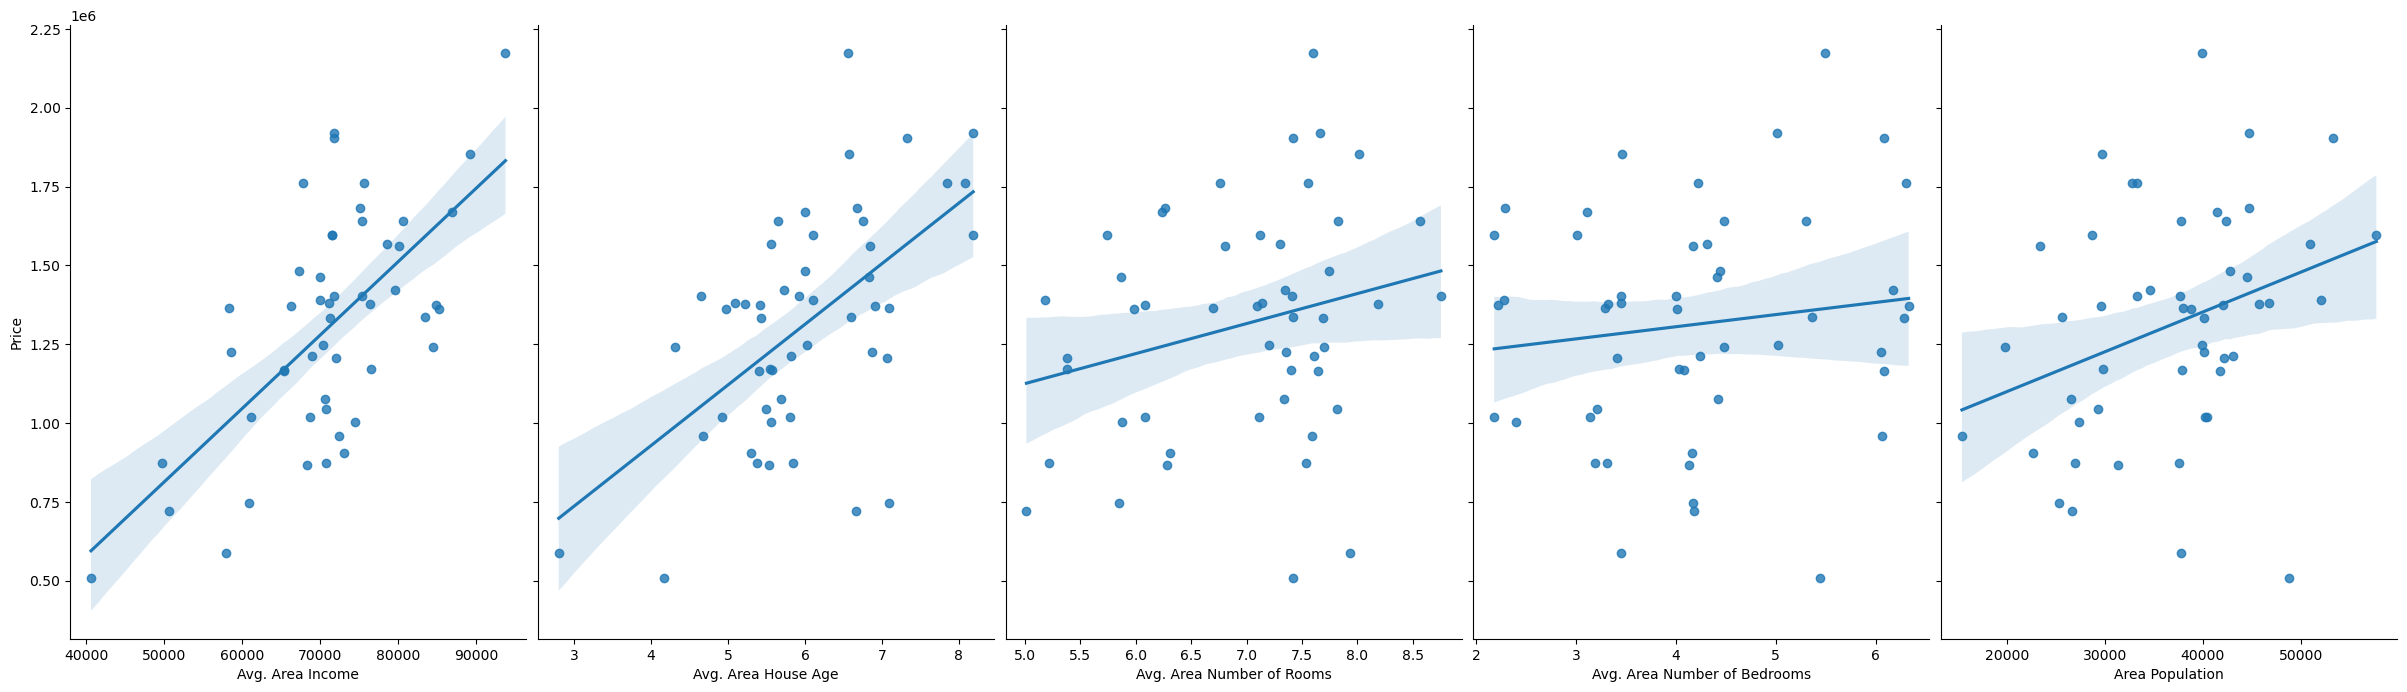

In [35]:
sns.pairplot(sample_df, x_vars = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'],
            y_vars = 'Price',height=7, aspect = 0.7, kind = 'reg')

DV vs IV

* Avg. Area Income is highly corelated with Price
* Avg. Area House Age is moderately corelated with Price
* Avg. Area Number of Rooms is slightly corelated with Price
* Avg. Area Number of Bedrooms is not very much corelated with Price
* Area Population is also slightly corelated

**Checking for Multicolinearity**

C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

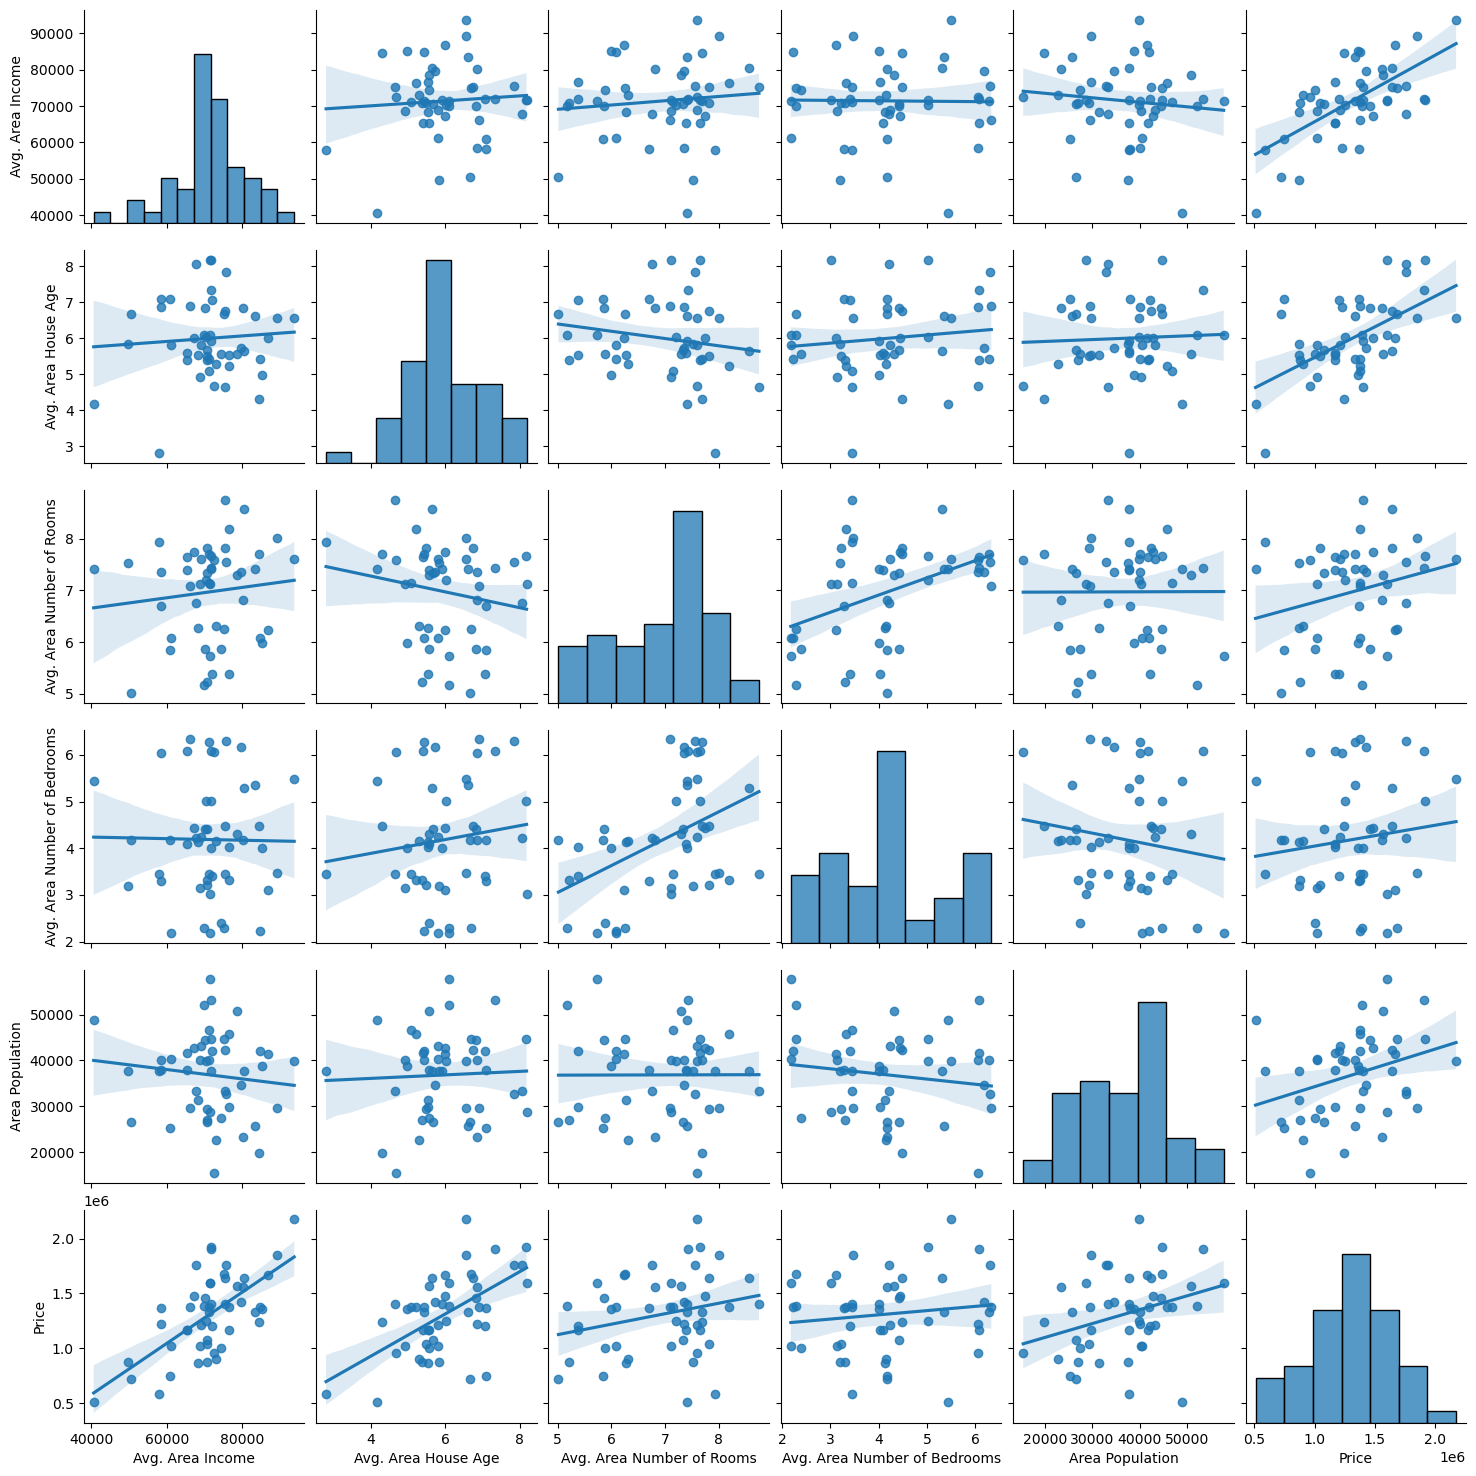

In [36]:
sns.pairplot(sample_df, kind = 'reg')

Avg. Area Number of Rooms and Avg. Area Number of Bedrooms are seem to be moderately corelated. This is the case of Multicollinearity. Including both of those in the reression can cause some serious problems because the regression,the computer when it does it, is not really sure what coefficients to assign to those two variables if they are so similar. e should not use them in regression as the seem to be redundant.

**Correlation matrix and heatmap**

In [37]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000,-0.002,-0.011,0.020,-0.016,0.640
Avg. Area House Age,-0.002,1.000,-0.009,0.006,-0.019,0.453
Avg. Area Number of Rooms,-0.011,-0.009,1.000,0.463,0.002,0.336
Avg. Area Number of Bedrooms,0.020,0.006,0.463,1.000,-0.022,0.171
Area Population,-0.016,-0.019,0.002,-0.022,1.000,0.409
Price,0.640,0.453,0.336,0.171,0.409,1.000


<Axes: >

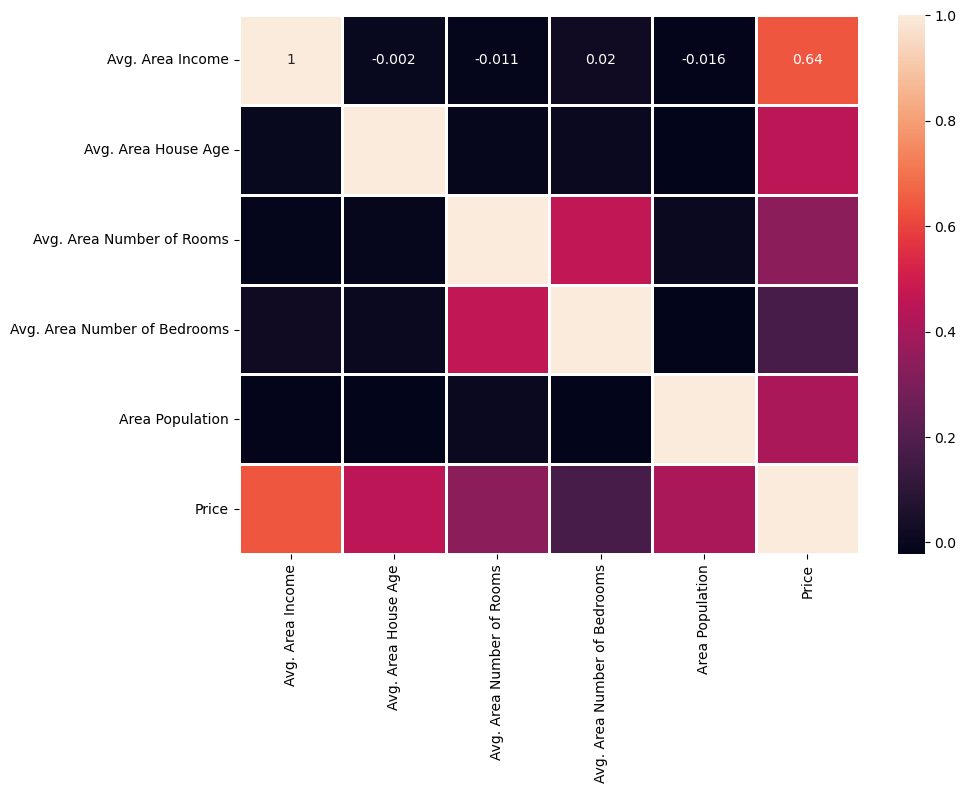

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

**Finding the p-value using stats.pearsonr**

Null hypothesis - There is no relationship between given two independent variables (reject if p < 0.05)

Alternative Hypothesis - There is a relationship between given two independent variables (reject if p > 0.05)

In [39]:
mat = df.values.T
mat

array([[7.95454586e+04, 7.92486425e+04, 6.12870672e+04, ...,
        6.33906869e+04, 6.80013312e+04, 6.55105818e+04],
       [5.68286132e+00, 6.00289981e+00, 5.86588984e+00, ...,
        7.25059061e+00, 5.53438842e+00, 5.99230531e+00],
       [7.00918814e+00, 6.73082102e+00, 8.51272743e+00, ...,
        4.80508098e+00, 7.13014386e+00, 6.79233610e+00],
       [4.09000000e+00, 3.09000000e+00, 5.13000000e+00, ...,
        2.13000000e+00, 5.44000000e+00, 4.07000000e+00],
       [2.30868005e+04, 4.01730722e+04, 3.68821594e+04, ...,
        3.32661455e+04, 4.26256202e+04, 4.65012838e+04],
       [1.05903356e+06, 1.50589091e+06, 1.05898799e+06, ...,
        1.03072958e+06, 1.19865687e+06, 1.29895048e+06]])

In [40]:
mat.shape

(6, 5000)

In [41]:
K = len(df.columns)
K

6

In [42]:
correl = np.empty((K,K), dtype=float)
correl

array([[7.95454586e+04, 7.92486425e+04, 6.12870672e+04, 6.33906869e+04,
        6.80013312e+04, 6.55105818e+04],
       [5.68286132e+00, 6.00289981e+00, 5.86588984e+00, 7.25059061e+00,
        5.53438842e+00, 5.99230531e+00],
       [7.00918814e+00, 6.73082102e+00, 8.51272743e+00, 4.80508098e+00,
        7.13014386e+00, 6.79233610e+00],
       [4.09000000e+00, 3.09000000e+00, 5.13000000e+00, 2.13000000e+00,
        5.44000000e+00, 4.07000000e+00],
       [2.30868005e+04, 4.01730722e+04, 3.68821594e+04, 3.32661455e+04,
        4.26256202e+04, 4.65012838e+04],
       [1.05903356e+06, 1.50589091e+06, 1.05898799e+06, 1.03072958e+06,
        1.19865687e+06, 1.29895048e+06]])

In [43]:
correl.shape

(6, 6)

In [44]:
p_vals = np.empty((K,K), dtype=float)
p_vals

array([[7.95454586e+04, 7.92486425e+04, 6.12870672e+04, 6.33906869e+04,
        6.80013312e+04, 6.55105818e+04],
       [5.68286132e+00, 6.00289981e+00, 5.86588984e+00, 7.25059061e+00,
        5.53438842e+00, 5.99230531e+00],
       [7.00918814e+00, 6.73082102e+00, 8.51272743e+00, 4.80508098e+00,
        7.13014386e+00, 6.79233610e+00],
       [4.09000000e+00, 3.09000000e+00, 5.13000000e+00, 2.13000000e+00,
        5.44000000e+00, 4.07000000e+00],
       [2.30868005e+04, 4.01730722e+04, 3.68821594e+04, 3.32661455e+04,
        4.26256202e+04, 4.65012838e+04],
       [1.05903356e+06, 1.50589091e+06, 1.05898799e+06, 1.03072958e+06,
        1.19865687e+06, 1.29895048e+06]])

In [45]:
for i,ac in enumerate(mat):
    for j,bc in enumerate(mat):
        if i>j:
            continue
        else:
            corr = stats.pearsonr(ac,bc)
            print('corr and p', corr)
            
        correl [i,j] = corr [0]
        correl [j,i] = corr [0]
        p_vals [i,j] = corr [1]
        p_vals [j,i] = corr [1]

corr and p PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)
corr and p PearsonRResult(statistic=-0.002006826428996921, pvalue=0.88718370186983)
corr and p PearsonRResult(statistic=-0.01103166028687076, pvalue=0.4354586437504353)
corr and p PearsonRResult(statistic=0.019788221120947625, pvalue=0.16180528911976688)
corr and p PearsonRResult(statistic=-0.01623373992756519, pvalue=0.2510976461979659)
corr and p PearsonRResult(statistic=0.639733778249894, pvalue=0.0)
corr and p PearsonRResult(statistic=1.0, pvalue=0.0)
corr and p PearsonRResult(statistic=-0.009428292244463852, pvalue=0.5050729943755143)
corr and p PearsonRResult(statistic=0.0061489233483431015, pvalue=0.6637875033158476)
corr and p PearsonRResult(statistic=-0.018742761942119823, pvalue=0.1851385074782945)
corr and p PearsonRResult(statistic=0.4525425371787558, pvalue=4.944750033725182e-251)
corr and p PearsonRResult(statistic=1.0, pvalue=0.0)
corr and p PearsonRResult(statistic=0.46269485961748263, pvalue=8.47928176

In [46]:
mat.shape

(6, 5000)

In [47]:
df_p = pd.DataFrame(p_vals)
df_p

,0,1,2,3,4,5
0,0.000,0.887,0.435,0.162,0.251,0.000
1,0.887,0.000,0.505,0.664,0.185,0.000
2,0.435,0.505,0.000,0.000,0.885,0.000
3,0.162,0.664,0.000,0.000,0.117,0.000
4,0.251,0.185,0.885,0.117,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000


In [48]:
df_corr = pd.DataFrame(correl)
df_corr

,0,1,2,3,4,5
0,1.000,-0.002,-0.011,0.020,-0.016,0.640
1,-0.002,1.000,-0.009,0.006,-0.019,0.453
2,-0.011,-0.009,1.000,0.463,0.002,0.336
3,0.020,0.006,0.463,1.000,-0.022,0.171
4,-0.016,-0.019,0.002,-0.022,1.000,0.409
5,0.640,0.453,0.336,0.171,0.409,1.000


In [49]:
df_f = pd.concat([df_corr, df_p], keys=['corr', 'p_val'])
df_f

0      1      2      3      4     5
corr  0  1.000 -0.002 -0.011  0.020 -0.016 0.640
      1 -0.002  1.000 -0.009  0.006 -0.019 0.453
      2 -0.011 -0.009  1.000  0.463  0.002 0.336
      3  0.020  0.006  0.463  1.000 -0.022 0.171
      4 -0.016 -0.019  0.002 -0.022  1.000 0.409
      5  0.640  0.453  0.336  0.171  0.409 1.000
p_val 0  0.000  0.887  0.435  0.162  0.251 0.000
      1  0.887  0.000  0.505  0.664  0.185 0.000
      2  0.435  0.505  0.000  0.000  0.885 0.000
      3  0.162  0.664  0.000  0.000  0.117 0.000
      4  0.251  0.185  0.885  0.117  0.000 0.000
      5  0.000  0.000  0.000  0.000  0.000 0.000

In [50]:
df_f.rename(columns = {0:"Avg. Area Income",1:'Avg. Area House Age',2:'Avg. Area Number of Rooms',3:'Avg. Area Number of Bedrooms',4:'Area Population',5:'Price'},inplace = True)
df_f.rename(index = {0:"Avg. Area Income",1:'Avg. Area House Age',2:'Avg. Area Number of Rooms',3:'Avg. Area Number of Bedrooms',4:'Area Population',5:'Price'},inplace = True)

In [51]:
df_f

Avg. Area Income  Avg. Area House Age  \
corr  Avg. Area Income                         1.000               -0.002   
      Avg. Area House Age                     -0.002                1.000   
      Avg. Area Number of Rooms               -0.011               -0.009   
      Avg. Area Number of Bedrooms             0.020                0.006   
      Area Population                         -0.016               -0.019   
      Price                                    0.640                0.453   
p_val Avg. Area Income                         0.000                0.887   
      Avg. Area House Age                      0.887                0.000   
      Avg. Area Number of Rooms                0.435                0.505   
      Avg. Area Number of Bedrooms             0.162                0.664   
      Area Population                          0.251                0.185   
      Price                                    0.000                0.000   

                                    Avg. Area Number of Rooms  \
corr  Avg. Area Income                                 -0.011   
      Avg. Area House Age                              -0.009   
      Avg. Area Number of Rooms                         1.000   
      Avg. Area Number of Bedrooms                      0.463   
      Area Population                                   0.002   
      Price                                             0.336   
p_val Avg. Area Income                                  0.435   
      Avg. Area House Age                               0.505   
      Avg. Area Number of Rooms                         0.000   
      Avg. Area Number of Bedrooms                      0.000   
      Area Population                                   0.885   
      Price                                             0.000   

                                    Avg. Area Number of Bedrooms  \
corr  Avg. Area Income                                     0.020   
      Avg. Area House Age                                  0.006   
      Avg. Area Number of Rooms                            0.463   
      Avg. Area Number of Bedrooms                         1.000   
      Area Population                                     -0.022   
      Price                                                0.171   
p_val Avg. Area Income                                     0.162   
      Avg. Area House Age                                  0.664   
      Avg. Area Number of Rooms                            0.000   
      Avg. Area Number of Bedrooms                         0.000   
      Area Population                                      0.117   
      Price                                                0.000   

                                    Area Population  Price  
corr  Avg. Area Income                       -0.016  0.640  
      Avg. Area House Age                    -0.019  0.453  
      Avg. Area Number of Rooms               0.002  0.336  
      Avg. Area Number of Bedrooms           -0.022  0.171  
      Area Population                         1.000  0.409  
      Price                                   0.409  1.000  
p_val Avg. Area Income                        0.251  0.000  
      Avg. Area House Age                     0.185  0.000  
      Avg. Area Number of Rooms               0.885  0.000  
      Avg. Area Number of Bedrooms            0.117  0.000  
      Area Population                         0.000  0.000  
      Price                                   0.000  0.000

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_11380\824416946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

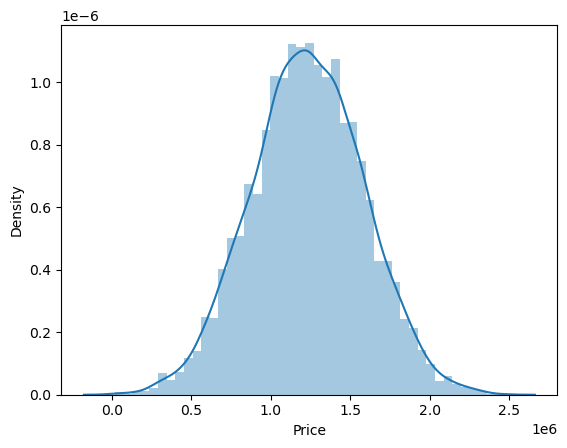

In [52]:
sns.distplot(df.Price)

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_11380\1518947423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg. Area Income'])
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg. Area Income', ylabel='Density'>

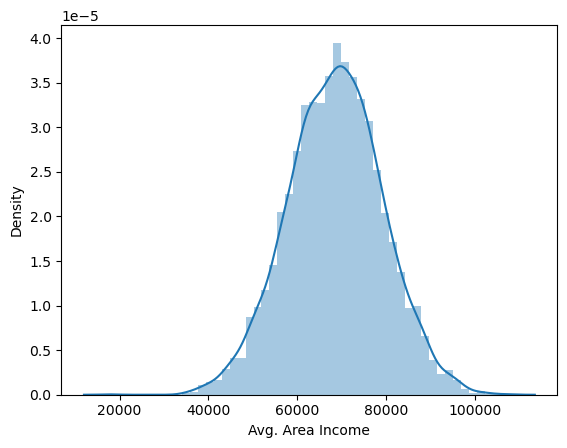

In [53]:
sns.distplot(df['Avg. Area Income'])

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_11380\2574366960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg. Area House Age'])
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg. Area House Age', ylabel='Density'>

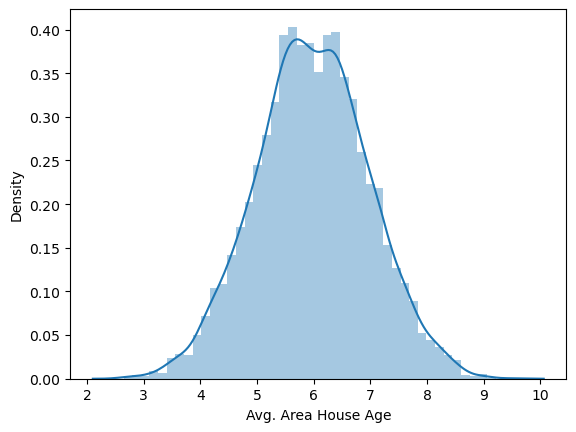

In [54]:
sns.distplot(df['Avg. Area House Age'])

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_11380\2894963991.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Area Population'])
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Area Population', ylabel='Density'>

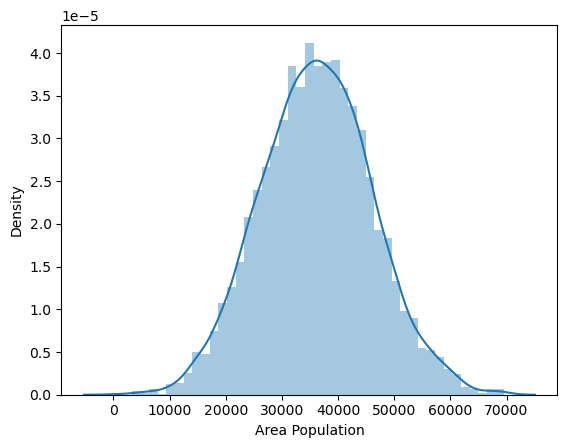

In [55]:
sns.distplot(df['Area Population'])

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_11380\4045387973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg. Area Number of Rooms'])
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Density'>

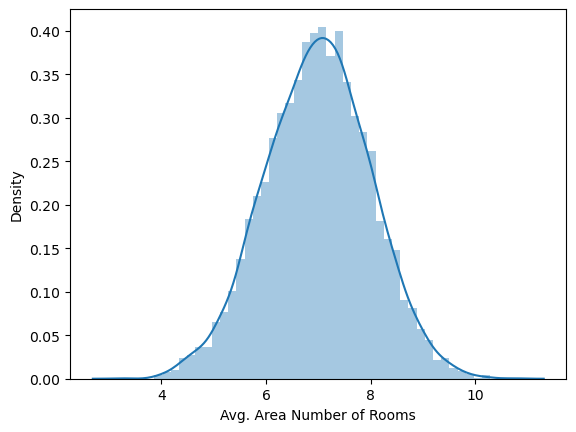

In [56]:
sns.distplot(df['Avg. Area Number of Rooms'])

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_11380\3801476532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg. Area Number of Bedrooms'])
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Density'>

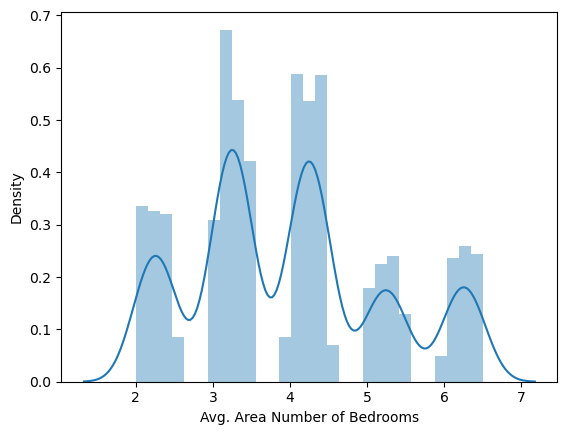

In [57]:
sns.distplot(df['Avg. Area Number of Bedrooms'])

###### FEW ASSUMPTIONS

1. address column was a text column thats why we dropped it because it was not a contributing factor
2. through data visualization we find out :
3. all variables except for avg, area number of bedrooms are positively correlated with price
4. avg area income has the strongest correlation with price
5. avg. area number of rooms and avg. area number of bedrooms are moderately correlated therefore this is the case of    multicollinearity. they are also least correlated to price at 0.171 and 0.336. therefore we can build our model by removing these two.
6. but before dropping these two we can check for p-value:
7. From the above table it can be seen that p value for Avg. Area Number of Rooms and Avg. Area Number of Bedrooms is less than 0.05. Hence this is strong evidence that there is a relationship between these to varibles.This is what we also observed in scatterplot.
8. But since the are corelated to targget variables that means they are also contributing variables.
9. all variables are normally distributed  

# Fitting a multiple linear model using sklearn

Here we ill create two model

Model 1 will include only 'Avg. Area Income','Avg. Area House Age' and 'Area Population' while Model 2 ill include all variales except Address

In [59]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
pre_process = preprocessing.StandardScaler()

## MODEL 1

In [61]:
x = df[['Avg. Area Income','Avg. Area House Age','Area Population']]
y = df['Price']

In [62]:
y.head()

0   1059033.558
1   1505890.915
2   1058987.988
3   1260616.807
4    630943.489
Name: Price, dtype: float64

In [63]:
x = pd.DataFrame(pre_process.fit_transform(x))
x.head()

,0,1,2
0,1.029,-0.297,-1.318
1,1.001,0.026,0.404
2,-0.685,-0.112,0.072
3,-0.491,1.222,-0.187
4,-0.807,-0.945,-0.988


### Test-train split

In [64]:
x_train, x_test, y_train, y_test = train_test_split (x,y, train_size = 0.7, test_size = 0.3, random_state = 2)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 3)
(1500, 3)
(3500,)
(1500,)


### Model fit and training

In [66]:
lm_1 = LinearRegression()
lm_1.fit(x_train, y_train)

LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**

In [83]:
print(lm_1.intercept_)
print(lm_1.coef_)

1232426.338195003
[228493.65692836 161934.24672572 150819.92065404]


In [84]:
coef_df = pd.DataFrame(data = lm_1.coef_, columns = ['Coefficients'], index = ['Avg, Area Income','Avg. Area House Age','Area Population'])
coef_df

,Coefficients
"Avg, Area Income",228493.657
Avg. Area House Age,161934.247
Area Population,150819.921


### Calculation of standard errors and t-statistic for the coefficients

In [86]:
n=x_train.shape[0]
n

3500

In [87]:
k=x_train.shape[1]
k

3

In [88]:
dfN = n-k
dfN

3497

In [89]:
train_pred = lm_1.predict(x_train)
train_pred.shape

(3500,)

In [90]:
train_error = np.square(train_pred - y_train)
train_error.shape

(3500,)

In [91]:
sum_error = np.sum(train_error)
sum_error

88158116688251.31

In [92]:
train_pred = lm_1.predict(x_train) #we got 3500 original data points and 3500 predicted
train_error = np.square(train_pred - y_train) # subtracting 3500 predicted data points on x_train - 3500 data points on y_train and squaring them
sum_error = np.sum(train_error)
se = [0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(x_train[list(x_train.columns)[i]]-x_train[list(x_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)

coef_df['Standard Error']=se
coef_df['t-statistic']=coef_df['Coefficients']/coef_df['Standard Error']
coef_df

,Coefficients,Standard Error,t-statistic
"Avg, Area Income",228493.657,2673.516,85.466
Avg. Area House Age,161934.247,2669.817,60.654
Area Population,150819.921,2667.640,56.537


The t-value measures the size of the difference relative to the variation in the data. Put another way, T is simply the calculated difference represented in units of standard error. The greater the magnitude of T, the greater the evidence against the null hypothesis. This means there is greater evidence that there is a significant difference. The closer T is to 0, the more likely there isn't a significant difference.

In [93]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(coef_df.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg, Area Income > 
Avg. Area House Age > 
Area Population


**R-square of the model fit**

In [77]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.799


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [94]:
y_pred = lm_1.predict(x_test)
print ("Type of the predicted object:", type(y_pred))
print ("Size of the predicted object:", y_pred.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


In [79]:
y_pred.shape

(1500,)

**Regression evaluation metrices**

In [95]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
r_squared = round(metrics.r2_score(y_test,y_pred),3)
print("R-squared value of predictions:",r_squared)

Mean absolute error (MAE): 125744.28903131379
Mean square error (MSE): 25152596152.693535
Root mean square error (RMSE): 158595.70029699273
R-squared value of predictions: 0.795


**Variance inflation factor**

Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2).  VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables.

In [96]:
vif_1 = (1/1-r_squared)
print("Variance inflation factor for Model 1",vif_1)

Variance inflation factor for Model 1 0.20499999999999996


**Adjusted R-square value**

Adjusted R-squared (or Adjusted R²) is a modified version of the R-squared (R²) statistic used in regression analysis. While R-squared measures the proportion of the variance in the dependent variable explained by the independent variables in a regression model, Adjusted R-squared takes into account the number of predictors and adjusts the R-squared value accordingly.

Adjusted R-squared penalizes the addition of unnecessary predictors by decreasing the value when additional predictors do not contribute meaningfully to the model's explanatory power. It provides a more conservative measure of the model's fit, accounting for the complexity and potential overfitting.

In [97]:
adjusted_r_squared =round( 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1),3)
print("Adjusted R-squared value of predictions:",adjusted_r_squared)

Adjusted R-squared value of predictions: 0.795


**The Above are the results of Model 1 where wwe ignored to columns. Now lets train and evaluate on Model 2 using all variables.**

## Model 2

### Feature Scaling

In [98]:
x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = df['Price']

In [99]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.459,5.683,7.009,4.090,23086.801
1,79248.642,6.003,6.731,3.090,40173.072
2,61287.067,5.866,8.513,5.130,36882.159
3,63345.240,7.188,5.587,3.260,34310.243
4,59982.197,5.041,7.839,4.230,26354.109


In [100]:
x = pd.DataFrame(pre_process.fit_transform(x))
x.head()

,0,1,2,3,4
0,1.029,-0.297,0.021,0.088,-1.318
1,1.001,0.026,-0.256,-0.722,0.404
2,-0.685,-0.112,1.516,0.931,0.072
3,-0.491,1.222,-1.393,-0.585,-0.187
4,-0.807,-0.945,0.847,0.202,-0.988


In [89]:
x.describe()

,0,1,2,3,4
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-4.766,-3.362,-3.730,-1.606,-3.626
25%,-0.666,-0.661,-0.685,-0.682,-0.681
50%,0.021,-0.007,0.015,0.056,0.004
75%,0.676,0.679,0.674,0.412,0.675
max,3.671,3.573,3.750,2.041,3.371


### Test-train split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=2)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


### Model fit and training

In [102]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**

In [103]:
print(lm.intercept_)
print(lm.coef_)

1231006.3190642651
[229275.22403179 163592.48713986 120113.25335113   3015.84757165
 150556.34029566]


In [104]:
cdf = pd.DataFrame(data = lm.coef_, columns = ['Coefficients'], index = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'])
cdf

,Coefficients
Avg. Area Income,229275.224
Avg. Area House Age,163592.487
Avg. Area Number of Rooms,120113.253
Avg. Area Number of Bedrooms,3015.848
Area Population,150556.340


### Calculation of standard errors and t-statistic for the coefficients

In [107]:
n=x_train.shape[0]
k=x_train.shape[1]
dfN = n-k

#prediction on training data
train_pred=lm.predict(x_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(x_train[list(x_train.columns)[i]]-x_train[list(x_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,229275.224,1717.675,133.480
Avg. Area House Age,163592.487,1715.299,95.373
Avg. Area Number of Rooms,120113.253,1722.270,69.741
Avg. Area Number of Bedrooms,3015.848,1737.425,1.736
Area Population,150556.340,1713.900,87.844


In [108]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


**R-square of the model fit**

In [98]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.917


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [109]:
y_pred = lm.predict(x_test)
print ("Type of the predicted object:", type(y_pred))
print ("Size of the predicted object:", y_pred.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


**Regression evaluation metrices**

In [101]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error (MAE): 79912.70946052398
Mean square error (MSE): 9831074697.74044
Root mean square error (RMSE): 99151.77606952102


**R-square value**

In [102]:
r_squared = round(metrics.r2_score(y_test,y_pred),3)
print("R-squared value of predictions:",r_squared)

R-squared value of predictions: 0.92


**R-square value**

In [110]:
adjusted_r_squared =round( 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1),3)
print("Adjusted R-squared value of predictions:",adjusted_r_squared)

Adjusted R-squared value of predictions: 0.794


**Variance inflation factor**

In [111]:
vif_2 = (1/1-r_squared)
print("Variance inflation factor for Model 2:",vif_2)

Variance inflation factor for Model 2: 0.20499999999999996
